In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
# ARIMA Model:

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load dataset
df_customer = pd.read_csv('Customer.csv', delimiter = ';')
df_product = pd.read_csv('Product.csv', delimiter = ';')
df_store = pd.read_csv('Store.csv', delimiter = ';')
df_transaction = pd.read_csv('Transaction.csv', delimiter = ';')

In [ ]:
# data cleaning
# head data
print(df_customer.head())
print(df_product.head())
print(df_store.head())
print(df_transaction.head())

   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57
  ProductID  Product Name  Price
0        P1     Choco Bar   8800
1        P2  Ginger Candy   3200
2        P3      Crackers   7500
3        P4   Potato Chip  12000
4        P5      Thai Tea   4200
   StoreID         StoreName GroupStore           Type   Latitude   Longitude
0        1     Prima Tendean      Prima   Modern Trade       -6,2  106,816666
1        2  Prima Kelapa Dua      Prima   Modern Trade  -6,914864  107,608238
2        3        Prima Kota      Prima   Modern Trade  -7,797068  110,370529
3        4       Gita Ginara       Gita  General Trade  -6,966667  110,416664
4        5           Bonafid       Gita  General Trade  -7,250445  112,768845
  TransactionID  CustomerID        Date 

In [ ]:
# info data
print(df_customer.info())
print(df_product.info())
print(df_store.info())
print(df_transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --

In [ ]:
# change data type
df_customer['Income'] = df_customer['Income'].str.replace(',', '.').astype('float')
df_store['Latitude'] = df_store['Latitude'].str.replace(',', '.').astype('float')
df_store['Longitude'] = df_store['Longitude'].str.replace(',', '.').astype('float')
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

In [ ]:
# merge data
df_merge = pd.merge(df_customer, df_transaction, on = 'CustomerID')
df_merge = pd.merge(df_merge, df_product.drop(columns = 'Price'), on = 'ProductID')
df_merge = pd.merge(df_merge, df_store, on = 'StoreID')
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,1,Married,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,0,Married,4.57,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,1,Single,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,0,Married,6.08,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643


In [ ]:
# model regresi: time series
df_regresi = df_merge.groupby('Date').agg({'Qty':'sum'}).reset_index()
df_regresi.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67


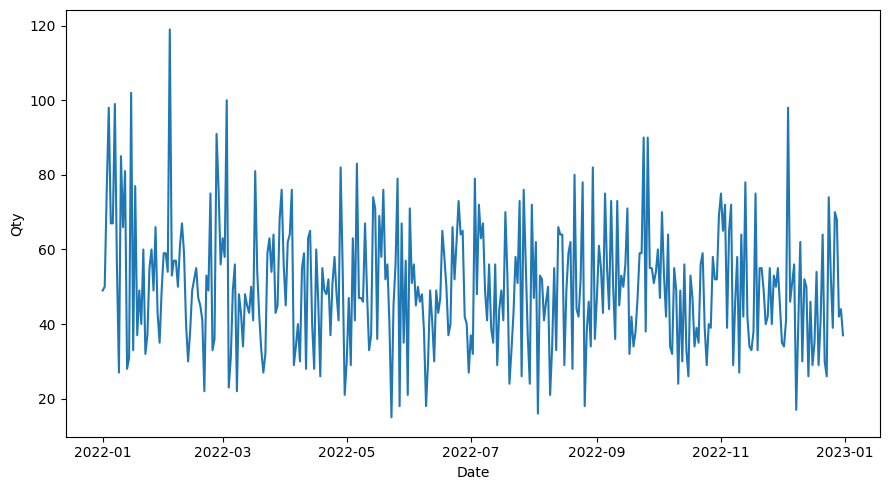

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.lineplot(x = 'Date', y = 'Qty', data = df_regresi)
plt.tight_layout()

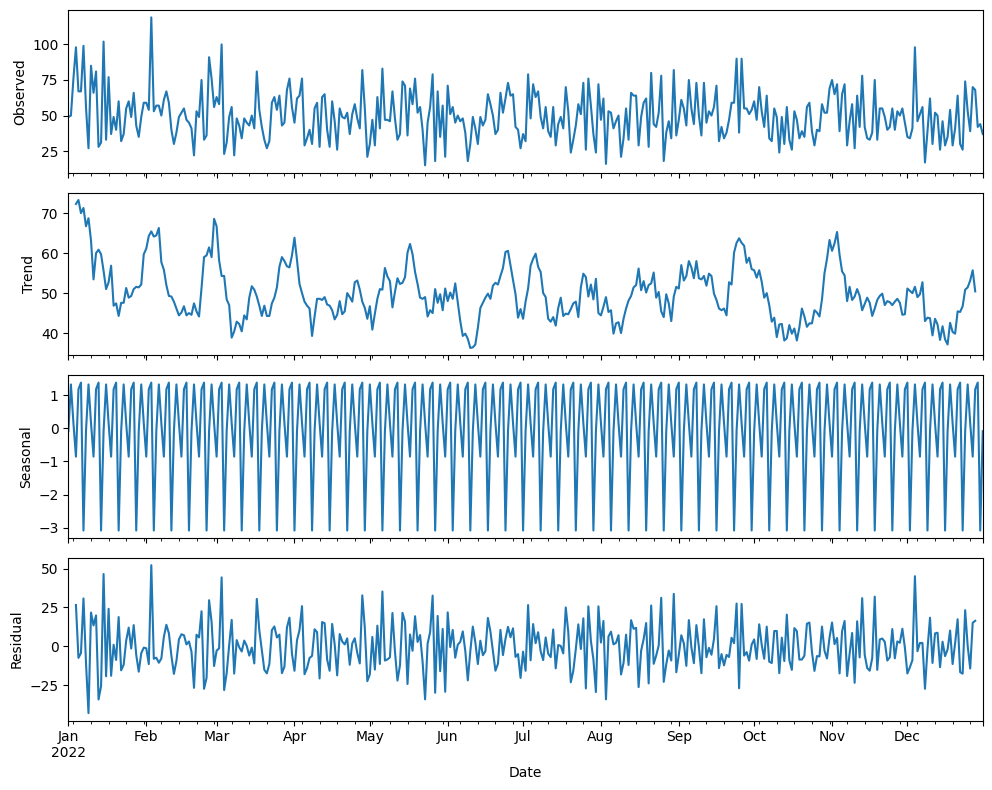

In [ ]:
df_regresi_index = df_regresi.set_index('Date')
regresi_decomposition = seasonal_decompose(df_regresi_index)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 8), sharex = True)
regresi_decomposition.observed.plot(ax = ax1)
ax1.set_ylabel('Observed')
regresi_decomposition.trend.plot(ax = ax2)
ax2.set_ylabel('Trend')
regresi_decomposition.seasonal.plot(ax = ax3)
ax3.set_ylabel('Seasonal')
regresi_decomposition.resid.plot(ax = ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()

In [ ]:
# Splitting the data into training and testing sets
train_size = int(len(df_regresi) * 0.8)  # 80% data for training, 20% for testing
train_data, test_data = df_regresi.iloc[:train_size], df_regresi.iloc[train_size:]

In [ ]:
train_data.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67


In [ ]:
test_data.head()

,Date,Qty
292,2022-10-20,39
293,2022-10-21,35
294,2022-10-22,56
295,2022-10-23,59
296,2022-10-24,39


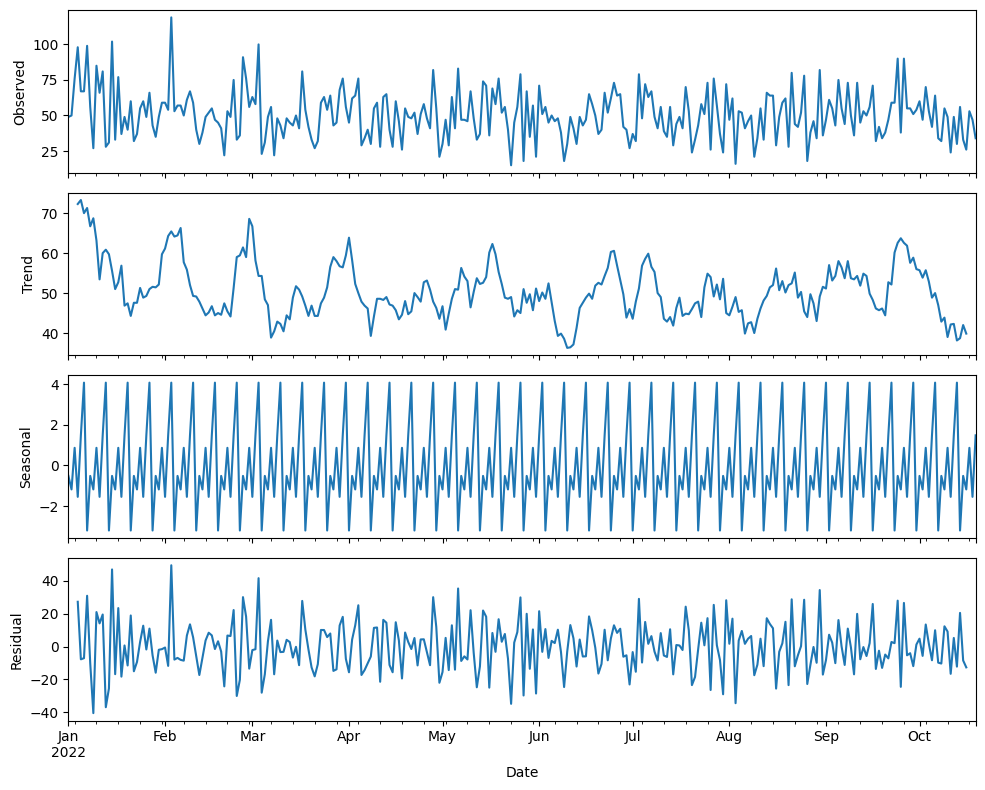

In [ ]:
train_data_index = train_data.set_index('Date')
regresi_decomposition = seasonal_decompose(train_data_index)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 8), sharex = True)
regresi_decomposition.observed.plot(ax = ax1)
ax1.set_ylabel('Observed')
regresi_decomposition.trend.plot(ax = ax2)
ax2.set_ylabel('Trend')
regresi_decomposition.seasonal.plot(ax = ax3)
ax3.set_ylabel('Seasonal')
regresi_decomposition.resid.plot(ax = ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()

In [ ]:
# Statistical test to validate stationarity

# Ho = The data is not stationary
# Ha = The data is stationary

alpha = 0.05
adfuller_pvalue = adfuller(train_data['Qty'])[1]

if adfuller_pvalue <= alpha:
    print('Reject Ho. The data is stationary')
    print(adfuller_pvalue)
else:
    print('Fail to reject Ho. The data is not stationary')
    print(adfuller_pvalue)

Reject Ho. The data is stationary
8.939693654974982e-30


In [ ]:
# Group the data by date and aggregate the Quantity column
data_group = data.groupby("Date")["Qty"].sum()

In [ ]:
diff_mus7 = train_data['Qty'].diff(periods = 7)
diff_mus7

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
287     1.0
288   -29.0
289     4.0
290    23.0
291   -15.0
Name: Qty, Length: 292, dtype: float64

In [ ]:
# Statistical test to validate stationarity

# Ho = The data is not stationary
# Ha = The data is stationary

alpha = 0.05
adfuller_pvalue = adfuller(diff_mus7.dropna())[1]

if adfuller_pvalue < alpha:
    print('Reject Ho. The data is stationary')
    print(adfuller_pvalue)
else:
    print('Fail to reject Ho. The data is not stationary')
    print(adfuller_pvalue)

Reject Ho. The data is stationary
8.752600524789744e-13


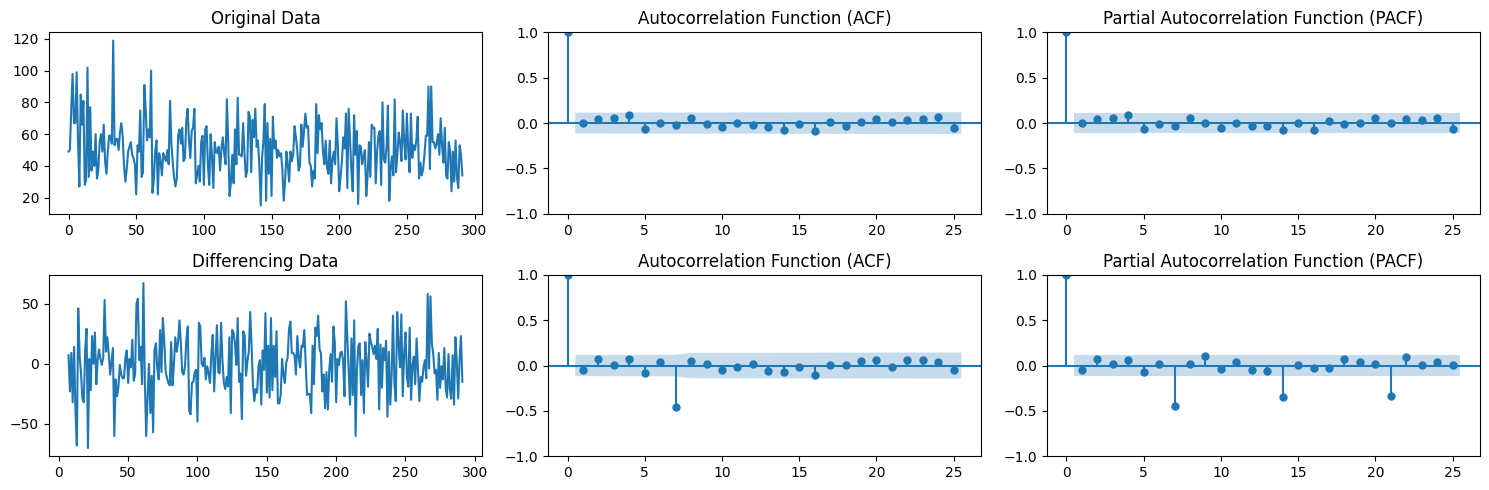

In [ ]:
# subplot
fig, ax = plt.subplots(2, 3, figsize = (15,5))

# plot the original data
ax[0, 0].plot(train_data['Qty'])
ax[0, 0].set_title('Original Data')

# plot the ACF and PACF
plot_acf(train_data['Qty'], ax = ax[0, 1])
ax[0, 1].set_title('Autocorrelation Function (ACF)')

plot_pacf(train_data['Qty'], ax = ax[0, 2])
ax[0, 2].set_title('Partial Autocorrelation Function (PACF)')

# plot the differencing data
ax[1, 0].plot(diff_mus7.dropna())
ax[1, 0].set_title('Differencing Data')

# plot the ACF and PACF
plot_acf(diff_mus7.dropna(), ax = ax[1, 1])
ax[1, 1].set_title('Autocorrelation Function (ACF)')

plot_pacf(diff_mus7.dropna(), ax = ax[1, 2])
ax[1, 2].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()

In [ ]:
def rmse(y_actual, y_pred):
  print(f'RMSE Value: {mean_squared_error(y_actual, y_pred)**0.5}')
def rsquare(y_actual, y_pred):
  print(f'R-squared Value: {r2_score(y_actual, y_pred)}')
def eval(y_actual, y_pred):
  rmse(y_actual, y_pred)
  rsquare(y_actual, y_pred)
  print(f'MAE Value: {mean_absolute_error(y_actual, y_pred)}')

In [ ]:
# Fit the ARIMA(0,0,0)(0,1,1,7) seasonal model
order = (0,0,0)
seasonal_order = (0, 1, 1, 7)
model = sm.tsa.SARIMAX(train_data['Qty'], order = order, seasonal_order = seasonal_order)
fit_qty = model.fit()
print(fit_qty.summary())

                                 SARIMAX Results                                 
Dep. Variable:                       Qty   No. Observations:                  292
Model:             SARIMAX(0, 1, [1], 7)   Log Likelihood               -1224.708
Date:                   Sat, 30 Sep 2023   AIC                           2453.417
Time:                           13:43:45   BIC                           2460.722
Sample:                                0   HQIC                          2456.345
                                   - 292                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -0.9350      0.040    -23.547      0.000      -1.013      -0.857
sigma2       300.6123     25.071     11.991      0.000     251.474     349.750
Ljung-Box (L1) (Q):         

RMSE Value: 16.022042682930422
R-squared Value: -0.09701244086943173
MAE Value: 13.328690484521504


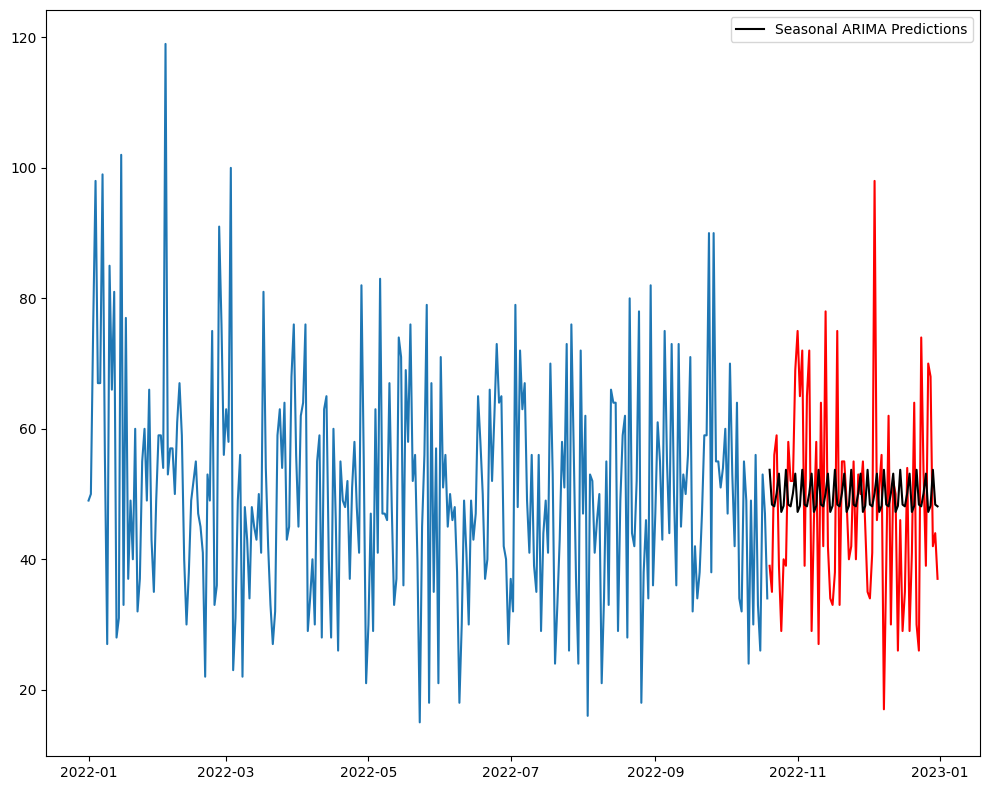

In [ ]:
# ARIMA (0,0,0) Seasonal (0,1,1,7)
df_train = train_data.set_index('Date')
df_test = test_data.set_index('Date')

y_pred = fit_qty.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = fit_qty.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

eval(df_test['Qty'], y_pred_out)

plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'Seasonal ARIMA Predictions')
plt.legend()

plt.tight_layout()

In [ ]:
# Fit the ARIMA(0,0,0)(1,1,1,7) seasonal model
order = (0,0,0)
seasonal_order = (1, 1, 1, 7)
model = sm.tsa.SARIMAX(train_data['Qty'], order = order, seasonal_order = seasonal_order)
fit_qty = model.fit()
print(fit_qty.summary())


                                 SARIMAX Results                                 
Dep. Variable:                       Qty   No. Observations:                  292
Model:             SARIMAX(1, 1, [1], 7)   Log Likelihood               -1224.298
Date:                   Sat, 30 Sep 2023   AIC                           2454.596
Time:                           13:44:44   BIC                           2465.554
Sample:                                0   HQIC                          2458.989
                                   - 292                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.0609      0.066     -0.927      0.354      -0.190       0.068
ma.S.L7       -0.9209      0.041    -22.734      0.000      -1.000      -0.841
sigma2       300.2902     24

RMSE Value: 16.07272935224695
R-squared Value: -0.10396434594603399
MAE Value: 13.358618452338368


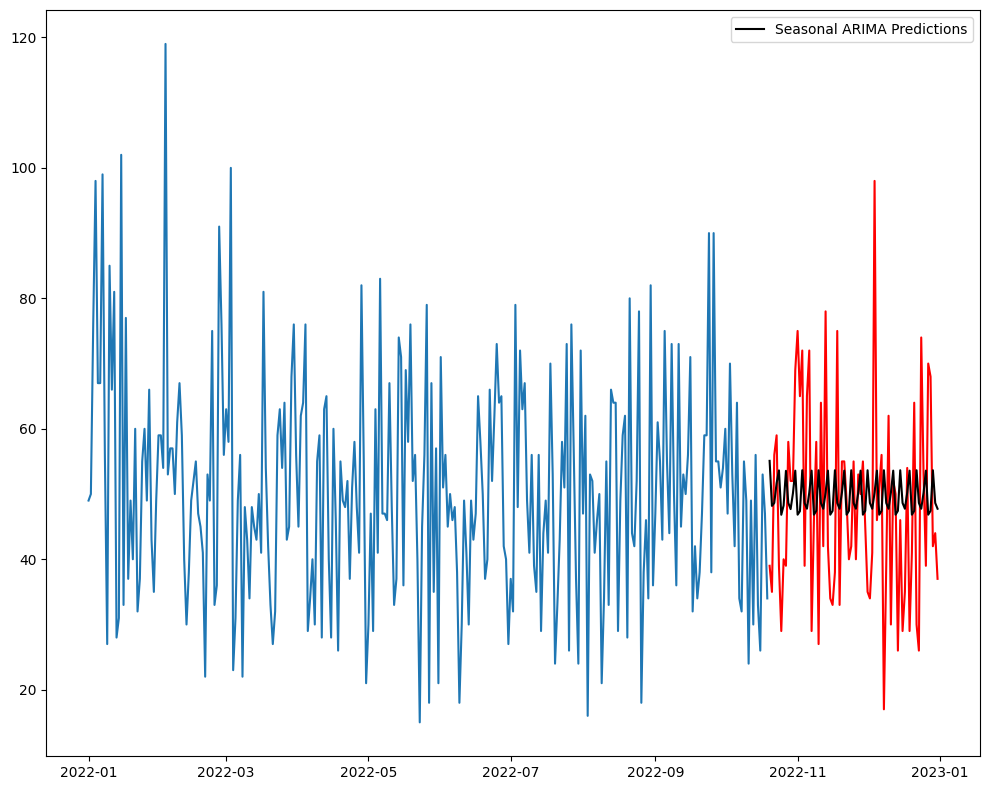

In [ ]:
# ARIMA (0,0,0) Seasonal (1,1,1,7)
df_train = train_data.set_index('Date')
df_test = test_data.set_index('Date')

y_pred = fit_qty.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = fit_qty.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

eval(df_test['Qty'], y_pred_out)

plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'Seasonal ARIMA Predictions')
plt.legend()

plt.tight_layout()

In [ ]:
# Fit the ARIMA(0,0,0)(1,1,0,7) seasonal model
order = (0,0,0)
seasonal_order = (1, 1, 0, 7)
model = sm.tsa.SARIMAX(train_data['Qty'], order = order, seasonal_order = seasonal_order)
fit_qty = model.fit()
print(fit_qty.summary())

                                SARIMAX Results                                
Dep. Variable:                     Qty   No. Observations:                  292
Model:             SARIMAX(1, 1, 0, 7)   Log Likelihood               -1276.238
Date:                 Sat, 30 Sep 2023   AIC                           2556.475
Time:                         13:45:58   BIC                           2563.780
Sample:                              0   HQIC                          2559.404
                                 - 292                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.4735      0.051     -9.254      0.000      -0.574      -0.373
sigma2       451.2209     38.111     11.840      0.000     376.525     525.917
Ljung-Box (L1) (Q):                   0.18  

RMSE Value: 18.844472452071
R-squared Value: -0.5175525959705869
MAE Value: 14.653489452408634


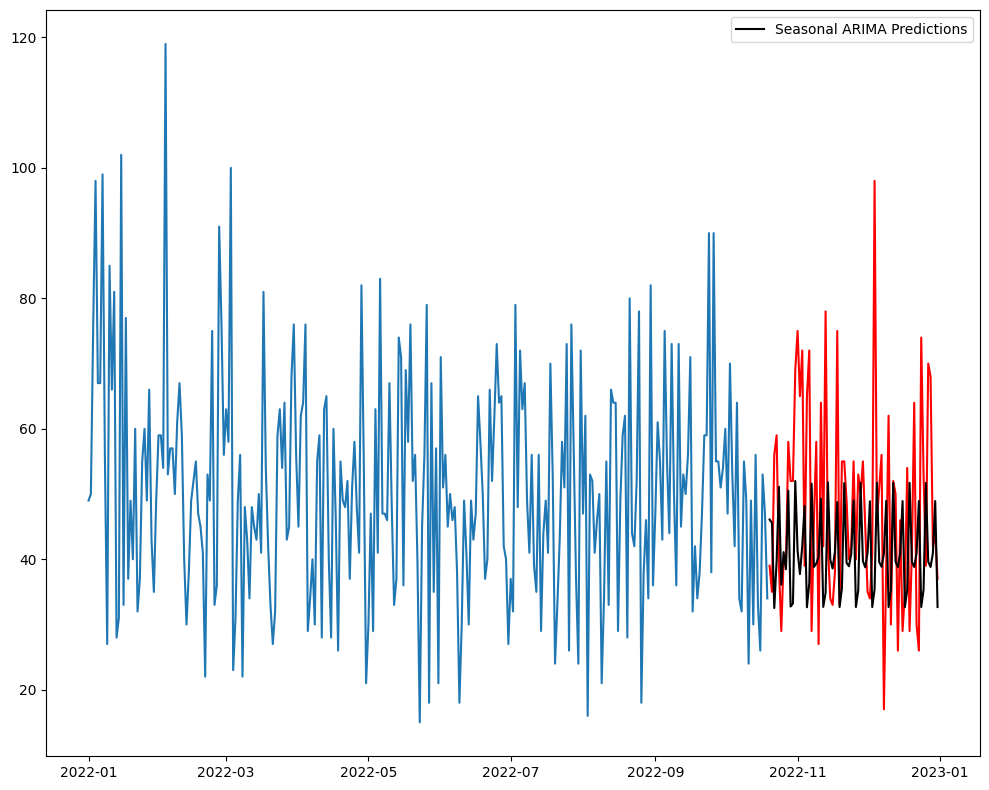

In [ ]:

# ARIMA (0,0,0) Seasonal (1,1,0,7)
df_train = train_data.set_index('Date')
df_test = test_data.set_index('Date')

y_pred = fit_qty.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = fit_qty.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

eval(df_test['Qty'], y_pred_out)

plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'Seasonal ARIMA Predictions')
plt.legend()

plt.tight_layout()

In [ ]:
##Forecast
model = sm.tsa.SARIMAX(df_test['Qty'], order = (0, 0, 0), seasonal_order = (1, 1, 0, 7))
fit_qty = model.fit()
print(fit_qty.summary())

                                SARIMAX Results                                
Dep. Variable:                     Qty   No. Observations:                   73
Model:             SARIMAX(1, 1, 0, 7)   Log Likelihood                -286.917
Date:                 Sat, 30 Sep 2023   AIC                            577.835
Time:                         13:47:55   BIC                            582.214
Sample:                     10-20-2022   HQIC                           579.565
                          - 12-31-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.5683      0.100     -5.683      0.000      -0.764      -0.372
sigma2       335.3540     72.827      4.605      0.000     192.615     478.093
Ljung-Box (L1) (Q):                   0.00  

In [ ]:
forecast_length = 31
forecast_result = fit_qty.get_forecast(forecast_length)
forecast_result_arima = forecast_result.conf_int()
forecast_result_arima['forecasted Qty'] = fit_qty.predict(start = forecast_result_arima.index[0],
                                                      end = forecast_result_arima.index[-1])
forecast_result_arima['Date'] = pd.date_range(start = '2023-01-01', end = '2023-01-31')
forecast_result_arima.set_index('Date', inplace = True)
forecast_result_arima.head()

,lower Qty,upper Qty,forecasted Qty
Date,,,
2023-01-01,17.676142,89.460497,53.568319
2023-01-02,-2.575369,69.208986,33.316808
2023-01-03,17.626566,89.410921,53.518743
2023-01-04,29.834546,101.618901,65.726723
2023-01-05,-0.712008,71.072347,35.180170


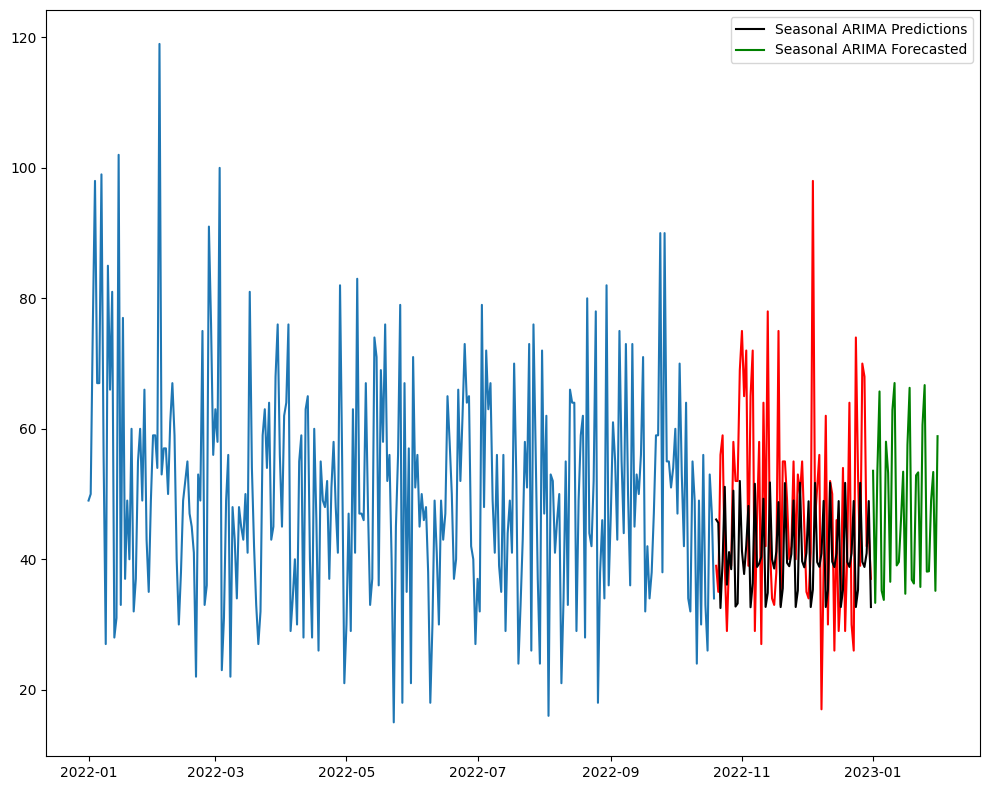

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color = 'red')
plt.plot(y_pred_out, color = 'black', label = 'Seasonal ARIMA Predictions')
plt.plot(forecast_result_arima['forecasted Qty'], color = 'green', label = 'Seasonal ARIMA Forecasted')
plt.legend()

plt.tight_layout()

In [ ]:
# Assuming model_fit is the fitted ARIMA model and data_group is the original time series data

# Get predictions
predictions = model_fit.predict(typ='levels')

# Calculate evaluation metrics
mse = mean_squared_error(data_group, predictions)
mae = mean_absolute_error(data_group, predictions)
rmse = math.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 285.7345897383273
MAE: 13.369350452734023
RMSE: 16.90368568503116
